<div style="text-align:center">
    
# 'Medi': The NLP-Based Medical Diagnostic Chatbot

### Mt. SAC CISB 63 Midterm Project Fall 2023

#### By
    
#### Paul Sandeen
    
</div>

## Introduction

Providing timely and accurate medical advice for non-life-threatening conditions is one aspect of the health care system where technology can be a benefit, especially to historically underserved communities.

A chatbot is an automated agent (artificial intelligence) that can interact with a user to ask questions and receive answers from a knowledge base developed by experts. Chatbots use Natural Language Processing (NLP) techniques to analyze user input to attempt to understand the words and context of the conversation. Medi is an interactive medical diagnostic chatbot.

The user will tell Medi about the nature of their health issue, and Medi will ask a question about when the issue started and another question related to the issue, and then issue a recommendation. Medi will then ask for feedback about the nature of the recommendation.

The project is divided into two parts: The first part is the NLP-powered  ‘engine’ that runs the Medi chatbot; the second part uses NLP techniques to analyze the information provided by the user during the chat session to evaluate Medi’s performance. 


## Intended Audience

This project will be of interest to anyone who wants to understand how NLP can be used in the context of interactive automated agents like chatbots. A basic understanding of the Python programming language, its associated NLP libraries, and basic NLP techniques is required.

## Materiels and Methods

This project uses the Python programming language running in the Anaconda environment. 

Associated Python data science libraries: Numpy, pandas, Matplotlib, Seaborn.

Associated Python NLP libraries: scikit-learn, NLTK, TextBlob, WordCloud, spaCy

The project was composed as a Jupyter Notebook.


## Data Source

The data for the project is all textual data and stored in text files that were custom-generated for this project. The files have the format <i>label:text</i>, where label is the nature of the user complaint, and text is the text associated with the label.

The project files are stored in the data subdirectory:

*	<b>complaints.txt</b>: Knowledge base of the types of user complaints (‘I have a stomach ache’)
*	<b>counts.txt</b>: Tracks the report frequency for each user complaint
*	<b>prompts.txt</b>: The introduction and departing text used by the chatbot
*	<b>questions1.txt</b>: Questions related to the complaint asked by the chatbot  
*	<b>questions2.txt</b>: Questions about the date the complaint was first observed
*	<b>recommendations.txt</b>: Medical recommendations for each user complaint
*	<b>sentiment.txt</b>: Tracks the number of positive, negative, and neutral comments left by users
*	<b>wait.txt</b>: Tracks how long the user waited (in days) to seek help from the chatbot


## Acquire the Necessary Software Packages

In [1]:
# Import the Python Data Science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import ast

In [2]:
# Import the Python scikit-learn libraries
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import make_classification

In [3]:
# Import the Python NLP libraries

from textblob import TextBlob

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.chunk import ne_chunk

import re

from datetime import date
from datetime import datetime

from wordcloud import WordCloud

import spacy
from spacy import displacy


In [4]:
# Download the NLTK databases
nltk.download("punkt")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\psand\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Load the Textual Data

In [5]:
# Load the complaints.txt file
complaints_file1 = open("data/complaints.txt", 'r')
complaints1 = complaints_file1.read()
complaints_list1 = complaints1.split("\n") 
complaints_dict1 = {} 
for line in complaints_list1: 
    if ':' in line:
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        complaints_dict1[key] = value 
complaints_file1.close()

In [6]:
# Load the questions1.txt file
questions_file1 = open("data/questions1.txt", 'r')
questions1 = questions_file1.read()
questions_list1 = questions1.split("\n") 
questions_dict1 = {} 
for line in questions_list1: 
    if ':' in line:
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        questions_dict1[key] = value 
questions_file1.close()

In [7]:
# Load the questions2.txt file
questions_file2 = open("data/questions2.txt", 'r')
questions2 = questions_file2.read()
questions_list2 = questions2.split("\n") 
questions_dict2 = {} 
for line in questions_list2: 
    if ':' in line:
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        questions_dict2[key] = value 
questions_file2.close()    

In [8]:
# Load the prompts.txt file
prompts_file = open("data/prompts.txt", 'r')
prompts = prompts_file.read()
prompts_list = prompts.split("\n") 
prompts_dict = {} 
for line in prompts_list: 
    if ':' in line:
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        prompts_dict[key] = value 
prompts_file .close()

In [9]:
# Load the recommendations.txt file
recommendations_file = open("data/recommendations.txt", 'r')
recommendations = recommendations_file.read()
recommendations_list = recommendations.split("\n") 
recommendations_dict = {} 
for line in recommendations_list:
    if ':' in line:
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        recommendations_dict[key] = value 
recommendations_file.close()

In [10]:
# Load the counts.txt file
counts_file = open("data/counts.txt", 'r')
counts = counts_file.read()
counts_list = counts.split("\n") 
counts_dict = {} 
for line in counts_list:
    if ':' in line: 
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        counts_dict[key] = int(value) 
counts_file.close()

In [11]:
# Load the wait.txt file
wait_file = open("data/wait.txt", 'r')
wait = wait_file.read()
wait_list = wait.split("\n") 
wait_dict = {} 
for line in wait_list:
    if ':' in line: 
        key, value = line.split(':') 
        key = key.strip() 
        value = value.strip() 
        value = ast.literal_eval(value)
        wait_dict[key] = value 
wait_file.close()

In [12]:
# Load the sentiment.txt data
sentiment_file = open("data/sentiment.txt", 'r')
sentiment = sentiment_file.read()
sentiment_list = sentiment.split("\n") 
sentiment_dict = {} 
for line in sentiment_list: 
    if ':' in line:
        key, value = line.split(':') 
        key = key.strip() 
        value = int(value.strip()) 
        sentiment_dict[key] = value 
sentiment_file.close()

## Exploratory Data Analysis (EDA)

#### Display the labeled user complaints

In [13]:
# User complaints dictionary
complaints_dict1

{'broken arm': 'I have a broken arm.',
 'broken leg': 'I have a broken leg.',
 'broken foot': 'I have a broken foot.',
 'broken ribs': 'I have broken ribs.',
 'sprain ankle': 'I have a sprained ankle.',
 'itch eye': 'I have itchy eyes.',
 'red eye': 'I have red eyes.',
 'pain chest': 'I have chest pain.',
 'pain ankle': 'I have ankle pain.',
 'pain mouth': 'I have mouth pain.',
 'pain gum': 'I have gum pain.',
 'pain back': 'I have back pain.',
 'ache stomach': 'I have a stomach ache.',
 'ache joint': 'I have joint pain.',
 'ache tooth': 'I have a tooth ache.',
 'rash skin': 'I have a skin rash.',
 'itch skin': 'My skin itches.',
 'bite bug': 'I have a bug bite.',
 'bite insect': 'I have an insect bite.',
 'bite dog': 'I have a dog bite.'}

#### Display the questions for each labeled complaint

In [14]:
# Chat questions dictionary
questions_dict1

{'broken arm': 'How did you break your arm?',
 'broken leg': 'How did you break you leg?',
 'broken foot': 'How did you break your foot?',
 'broken ribs': 'How did you break your ribs?',
 'sprain ankle': 'Is there bruising in the area?',
 'itch eye': 'Which eye is affected?',
 'red eye': 'Which eye is affected?',
 'pain chest': "Is this the first time you've had chest pain?",
 'pain ankle': 'Have you had pain in you ankle before?',
 'pain mouth': 'Where in the mouth does it hurt?',
 'pain gum': 'Are the gums bleeding?',
 'pain back': 'What caused the back pain (lifting heavy objects)?',
 'ache stomach': 'Did you eat something unusual?',
 'ache joint': 'Do you have arthritis',
 'ache tooth': 'Has the tooth caused pain before?',
 'rash skin': 'Where is the skin rash?',
 'itch skin': 'Is there a rash in the area?',
 'bite bug': 'Where is the bug byte?',
 'bite insect': 'Where is the insect byte?',
 'bite dog': 'Where is the dog byte?'}

#### Display questions for when the incident was first noticed for each labeled complaint

In [15]:
# Chat questions to acquire the date the complaint was first noticed
questions_dict2

{'broken arm': 'What date did you break your arm (mm/dd/yyyy)?',
 'broken leg': 'What date did you break your leg (mm/dd/yyyy)?',
 'broken foot': 'What date did you break your foot (mm/dd/yyyy)?',
 'broken ribs': 'What date did you break your ribs (mm/dd/yyyy)?',
 'sprain ankle': 'What date did you sprain your ankle (mm/dd/yyyy)?',
 'itch eye': 'What date did your eye itch start (mm/dd/yyyy)?',
 'red eye': 'What date did your eye redness start (mm/dd/yyyy)?',
 'pain chest': 'What date did your chest pain start (mm/dd/yyyy)?',
 'pain ankle': 'What date did your ankle pain start (mm/dd/yyyy)?',
 'pain mouth': 'What date did your mouth pain start (mm/dd/yyyy)?',
 'pain gum': 'What date did your break your leg (mm/dd/yyyy)?',
 'pain back': 'What date did your back pain start (mm/dd/yyyy)?',
 'ache stomach': 'What date did your stomach ache start (mm/dd/yyyy)?',
 'ache joint': 'What date did your aching joint start (mm/dd/yyyy)?',
 'ache tooth': 'What date did your tooth ache start (mm/dd/y

#### Display the user prompts

In [16]:
# User prompts dictionary
prompts_dict

{'intro': "Hello! I'm Medi - your Medical Diagnostic ChatBot! How can I help you?",
 'outtro': 'Thank you for using Medi! Was my advice helpful?'}

#### Display the labeled recommendations

In [17]:
# Recommendations dictionary
recommendations_dict

{'broken arm': 'Go to your nearest hospital and get an X-ray.',
 'broken leg': 'Go to your nearest hospital and get an X-ray.',
 'broken foot': 'Go to your nearest hospital and get an X-ray.',
 'broken ribs': 'Go to your nearest hospital and get an X-ray.',
 'sprain ankle': 'Elevate the ankle and apply an ice pack.',
 'itch eye': 'Wash out the affected eye. Make an appointment with your doctor.',
 'red eye': 'Wash out the affected eye. Make an appointment with your doctor.',
 'pain chest': 'Go to the nearest Emergency Room immediately!',
 'pain ankle': 'Elevate the ankle and apply an ice pack.',
 'pain mouth': 'See your local dentist.',
 'pain gum': 'See your local dentist.',
 'pain back': 'Get bed rest and try relax.',
 'ache stomach': 'Take milk of magnesia.',
 'ache joint': 'Make an appointment to see your doctor.',
 'ache tooth': 'See your local dentist.',
 'rash skin': 'Apply Calamine lotion to the area.',
 'itch skin': 'Apply Calamine lotion to the area.',
 'bite bug': 'Wash the 

#### Display the frequency counts for each user complaint

In [18]:
# Complaints dictionary
counts_dict

{'broken arm': 154,
 'broken leg': 116,
 'broken foot': 5,
 'broken ribs': 74,
 'sprain ankle': 200,
 'itch eye': 31,
 'red eye': 20,
 'pain chest': 102,
 'pain ankle': 115,
 'pain mouth': 62,
 'pain gum': 87,
 'pain back': 190,
 'ache stomach': 141,
 'ache joint': 98,
 'ache tooth': 166,
 'rash skin': 177,
 'itch skin': 45,
 'bite bug': 120,
 'bite insect': 150,
 'bite dog': 56}

#### Display how long the user delayed in reporting the complaint

In [19]:
# Wait dictionry
wait_dict

{'broken arm': [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1],
 'broken leg': [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2],
 'broken foot': [0, 1, 1],
 'broken ribs': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 'sprain ankle': [2, 2, 1, 1, 1, 0, 0, 1, 1, 0],
 'itch eye': [3, 5, 4, 3, 5, 4, 3, 2, 4, 5],
 'red eye': [3, 4, 4, 3, 5, 3, 3, 2, 1, 1],
 'pain chest': [0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
 'pain ankle': [4, 5, 4, 3, 5, 4, 3, 3, 2, 1],
 'pain mouth': [1, 3, 2, 3, 4, 3, 2, 1, 2, 1],
 'pain gum': [3, 2, 4, 5, 6, 3, 2, 4, 5, 5],
 'pain back': [5, 4, 4, 3, 4, 3, 2, 1, 4, 5],
 'ache stomach': [1, 4, 3, 2, 3, 1, 1, 0, 1, 2],
 'ache joint': [4, 5, 6, 3, 2, 6, 7, 3, 2, 4],
 'ache tooth': [1, 2, 1, 2, 3, 2, 3, 1, 2, 2],
 'rash skin': [1, 5, 2, 1, 3, 4, 1, 3, 4, 4],
 'itch skin': [2, 3, 4, 4, 2, 5, 6, 2, 7, 2],
 'bite bug': [0, 1, 3, 2, 1, 2, 3, 2, 1, 2],
 'bite dog': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]}

#### Display the sentiment analysis scores of user feedback

In [20]:
# Sentiment dictionary
sentiment_dict

{'positive': 115, 'negative': 78, 'neutral': 40}

## Apply NLP Techniques

### Project Part 1: The Medi Chatbot Engine

A pipeline is used to help map the user complaint typed into the chatbot interface to the correct label. 

The pipeline collects all the necessary steps: 

* Tokenize the text

* Feature extraction using bag-of-words (BOW) and term frequency-inverse document frequency (TF-IDF)

* Provide the multinomial Naïve Bayes classifier, a common NLP algorithm used for text classification


In [21]:
# Create a text classification pipeline
text_clf = Pipeline([
    ('BOW', CountVectorizer()),    # Convert text to a BOW representation
    ('tfid', TfidfTransformer()),  # Apply TF-IDF transformation
    ('clf', MultinomialNB())       # Multinomial Naive Bayes classifier
])

#### Fit (train) the model

In [22]:
# Fit the pipeline to the data
text_clf.fit(list(complaints_dict1.values()), list(complaints_dict1.keys()))


Pipeline(steps=[('BOW', CountVectorizer()), ('tfid', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [23]:
# Show a sample text prediction
str(text_clf.predict(['I have a broken leg'])[0])

'broken leg'

#### Run the Medi Chatbot

In [25]:
# Question #1: Introduction and what is your health concern?

print(prompts_dict['intro'])
user_input = input('>>')

# Correct the spelling of the user input
user_input_corrected = str(TextBlob(user_input.lower()).correct())

# Predict the patient condition
patient_condition = str(text_clf.predict([user_input_corrected])[0])

# Print the predicted patient condition
print(patient_condition)

# Question #2: When did your health concern start?

valid_date = False
date_regex = r"^(0[1-9]|1[0-2])/(0[1-9]|[12][0-9]|3[01])/[0-9]{4}$"
    
while not valid_date:
    print(questions_dict2[patient_condition])
    date_input = input('>>')
    if re.match(date_regex, date_input):
        valid_date = True

# Question #3: How did this happen to you?
print(questions_dict1[patient_condition])
cause_input = input('>>')

# Print the recommendation
print(recommendations_dict[patient_condition])   

# Get user feedback
print(prompts_dict['outtro'])
user_feedback = input('>>')


Hello! I'm Medi - your Medical Diagnostic ChatBot! How can I help you?


>> I have a broken arm


broken arm
What date did you break your arm (mm/dd/yyyy)?


>> 10/24/2023


How did you break your arm?


>> I fell down


Go to your nearest hospital and get an X-ray.
Thank you for using Medi! Was my advice helpful?


>> Yes it was very helpful


#### Result of the Medi chatbot session

Medi was able to:

* predict the user complaint
* map the complaint to the correct label 
* ask the follow-up questions
* request feedback


### Project Part 2: Analyze the Collected Data

#### Track the user complaint

After the Medi chatbot session, track the user complaint by incrementing the complaint count for that label by 1 and update the counts.txt file

In [26]:
# Increment the count for this user complaint
counts_dict[patient_condition] += 1

In [27]:
# Save the updated counts to disk
file_path = "data/counts.txt"

with open(file_path, 'w') as file:
    for key, value in counts_dict.items():
        file.write(f"{key}:{value}\n")

print(f"The dictionary has been saved to {file_path}")

The dictionary has been saved to data/counts.txt


#### Visualize the user complaint totals

Text(0.5, 1.0, 'Reported Patient Complaints')

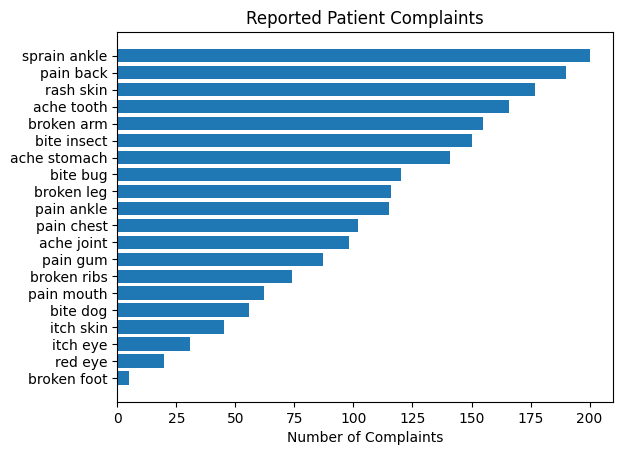

In [28]:
# Sort the complaints dictionary by number of reported complaints
sorted_complaints = dict(sorted(counts_dict.items(), key=lambda item: item[1]))
plot_complaints = list(sorted_complaints.keys())
plot_counts = list(sorted_complaints.values())

plt.barh(plot_complaints, plot_counts)
plt.xlabel('Number of Complaints')
plt.title('Reported Patient Complaints')

<b>Plot interpretation</b>: The most common user complaint is a sprain ankle, followed by back pain and skin rash. The least common complaint was ‘broken foot’ which was meant to be a word substitute for an ankle sprain.

#### Analyize the date of the incident experienced by the user

Sometimes users wait for a few days before they seek out help from Medi. For some complaints (like a skin rash) this can be a few days, while for more serious things (like a dog bite) the user may seek from Medi on the same day as the incident. 

In [29]:
# Get the current date
current_date = datetime.now()

# Convert the date entered by the user to a date format
month, day, year = map(int, date_input.split('/'))
date_event =  datetime(year, month, day)

# Calcuate the difference between the current date and user entered date in days
date_difference = (current_date - date_event).days



#### Update the wait-to-report dictionary and save to the wait.txt file

In [30]:
# Append the new wait-to-report data
wait_dict[patient_condition].append(date_difference)
wait_dict

{'broken arm': [0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1],
 'broken leg': [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 2],
 'broken foot': [0, 1, 1],
 'broken ribs': [0, 0, 1, 1, 0, 0, 0, 0, 0, 0],
 'sprain ankle': [2, 2, 1, 1, 1, 0, 0, 1, 1, 0],
 'itch eye': [3, 5, 4, 3, 5, 4, 3, 2, 4, 5],
 'red eye': [3, 4, 4, 3, 5, 3, 3, 2, 1, 1],
 'pain chest': [0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
 'pain ankle': [4, 5, 4, 3, 5, 4, 3, 3, 2, 1],
 'pain mouth': [1, 3, 2, 3, 4, 3, 2, 1, 2, 1],
 'pain gum': [3, 2, 4, 5, 6, 3, 2, 4, 5, 5],
 'pain back': [5, 4, 4, 3, 4, 3, 2, 1, 4, 5],
 'ache stomach': [1, 4, 3, 2, 3, 1, 1, 0, 1, 2],
 'ache joint': [4, 5, 6, 3, 2, 6, 7, 3, 2, 4],
 'ache tooth': [1, 2, 1, 2, 3, 2, 3, 1, 2, 2],
 'rash skin': [1, 5, 2, 1, 3, 4, 1, 3, 4, 4],
 'itch skin': [2, 3, 4, 4, 2, 5, 6, 2, 7, 2],
 'bite bug': [0, 1, 3, 2, 1, 2, 3, 2, 1, 2],
 'bite dog': [0, 1, 0, 0, 0, 0, 1, 0, 0, 1]}

In [31]:
# Update the wait-to-report text file with the latest information
file_path = "data/wait.txt"

with open(file_path, 'w') as file:
    for key, value in wait_dict.items():
        file.write(f"{key}:{value}\n")

print(f"The dictionary has been saved to {file_path}")

The dictionary has been saved to data/wait.txt


#### Calculate the average wait-to-report time for each user complaint

In [32]:
# Calculate the wait-to-report times for each user complaint
waitplot_dict = {}

for key, value in wait_dict.items():
    avg = round(sum(value) / len(value),2)
    waitplot_dict[key] = avg

# Display the average wait-to-report times (in days)
waitplot_dict


{'broken arm': 0.77,
 'broken leg': 0.36,
 'broken foot': 0.67,
 'broken ribs': 0.2,
 'sprain ankle': 0.9,
 'itch eye': 3.8,
 'red eye': 2.9,
 'pain chest': 0.3,
 'pain ankle': 3.4,
 'pain mouth': 2.2,
 'pain gum': 3.9,
 'pain back': 3.5,
 'ache stomach': 1.8,
 'ache joint': 4.2,
 'ache tooth': 1.9,
 'rash skin': 2.8,
 'itch skin': 3.7,
 'bite bug': 1.7,
 'bite dog': 0.3}

#### Visualize the average user wait-to-report complaint times (in days)

Text(0.5, 1.0, 'Average Number of Days Delayed Before Reporting to Medi')

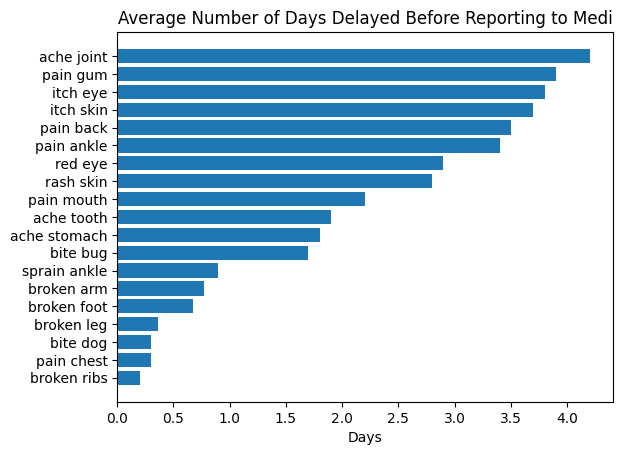

In [33]:
# Sort the wait-to-complain wait average times (in days) by user complaint
sorted_wait = dict(sorted(waitplot_dict.items(), key=lambda item: item[1]))
plot_waits = list(sorted_wait.keys())
plot_wait_days = list(sorted_wait.values())

plt.barh(plot_waits, plot_wait_days)
plt.xlabel('Days')
plt.title('Average Number of Days Delayed Before Reporting to Medi')

<b>Plot interpretation</b>: Patients waited the longest to report joint ache to Medi, followed by gum pain and eye itch. A dog bite, chest pain and broken ribs had the lowest time to report.

#### Attempt to analyze the cause of the user complaint

This section is to be used for situations when the user knows what caused their complaint (for example, a broken arm was caused by falling down). 

A user may not know what caused a skin rash or an upset stomach.

In [34]:
# Correct the spelling of the cause input
cause_input_corrected = str(TextBlob(cause_input.lower()).correct())

In [35]:
# Tokenize the cause input
tokens = word_tokenize(cause_input_corrected)

# Apply Part-of-speech (POS) tagging
pos_tags = pos_tag(tokens)

# Apply Named Entity Recognition (NER)
ner_tree = ne_chunk(pos_tags)

# Remove stopwords from the user input
cause_input_nostopwords = [word for word in tokens if word.lower() not in stopwords.words("english")]

In [36]:
# Display the tokens
tokens

['i', 'fell', 'down']

In [37]:
# Display the POS tags
pos_tags

[('i', 'NN'), ('fell', 'VBD'), ('down', 'RB')]

#### Attempt to isolate the verbs (action words) that may have caused the complaint.

In [38]:
# Create a list of verb tags
verbs = [word for word, tag in pos_tags if tag in ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']]


#### Use Lemmatization to find the base form of the verbs (including irregular verbs) for the cause of patient complaints

In [39]:
# Store the base form of the verb
base_form = ''

# Define irregular verbs
irregular_verbs = {
    'fell': 'fall',
    # Add more irregular verbs here
}

# Sort through the verbs for the cause of the user complaint
for verb in verbs:
    if verb in irregular_verbs:
        base_form = irregular_verbs[verb]
    else:
        lemmatizer = WordNetLemmatizer()
        base_form += lemmatizer.lemmatize(verb, pos='v')

# Print the verb
print(base_form)


fall


In [40]:
# Use displaCy to visualize the sentence structure of the complaint
nlp = spacy.load("en_core_web_sm")
document = nlp(str(TextBlob(user_input.lower()).correct()))
displacy.render(document, style='dep', jupyter=True)

<b>Plot interpretation</b>: Since the cause of the patient complaint is open-ended, an expert can use the information provided by Medi to match the patient complaint with the cause of the complaint (for example a broken arm was caused by a fall).

### Sentiment analysis

The purpose of sentiment analysis is to examine the feedback to see if the user thought that the advice provided by Medi was helpful (positive sentiment) or not (negative sentiment). It is possible to have a neutral sentiment if the advice is related to the problem though not very helpful.

Polarity measures agreement and ranges from -1 (strong disapproval) to 1 (strong approval).

Subjectivity ranges from 0 (the text contains factual information) to 1 (the text contains a personal opinion).



In [41]:
# Define the text for sentiment analysis
text = user_feedback

# Create a TextBlob object
blob = TextBlob(text)

# Analyze sentiment
sentiment = blob.sentiment

# Sentiment polarity ranges from -1 (negative) to 1 (positive)
# Sentiment subjectivity ranges from 0 (objective) to 1 (subjective)
polarity = sentiment.polarity
subjectivity = sentiment.subjectivity

# Determine sentiment labels
if polarity > 0:
    sentiment_rating = "positive"
elif polarity < 0:
    sentiment_rating = "negative"
else:
    sentiment_rating = "neutral"

# Print sentiment analysis results
print("User input:", text)
print("Polarity:", polarity)
print("Subjectivity:", subjectivity)
print("Sentiment:", sentiment_rating)

User input: Yes it was very helpful
Polarity: 0.2
Subjectivity: 0.3
Sentiment: positive


<b>Result interpretation</b>: The polarity produced a result of 0.2 from a scale of -1 to 1, meaning mildly positive. The subjectivity was 0.3 on a scale of 0 to 1, meaning an objective statement. The overall sentiment of the user feedback was positive.

#### Update the sentiment rating scores and save to disk

In [42]:
# Increment the sentiment score for the user rating
sentiment_dict[sentiment_rating] += 1

In [43]:
# Save the updated sentiment dictionary to disk
file_path = "data/sentiment.txt"

with open(file_path, 'w') as file:
    for key, value in sentiment_dict.items():
        file.write(f"{key}:{value}\n")

print(f"The dictionary has been saved to {file_path}")

The dictionary has been saved to data/sentiment.txt


#### Visualize the sentiment scores for all user interactions

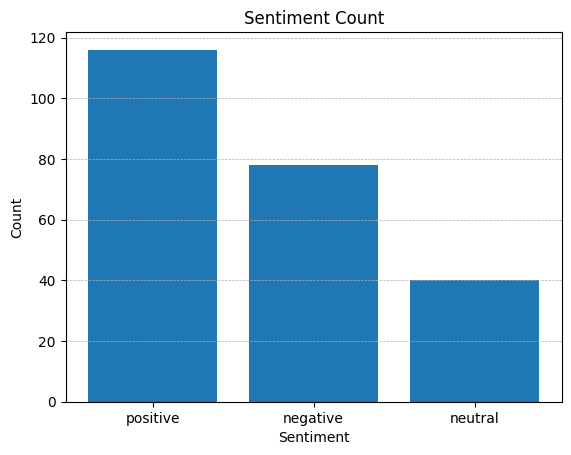

In [44]:
# Create variables to hold the user sentiment values
items = sentiment_dict.keys()
counts = sentiment_dict.values()

# Plot the sentiment results
plt.bar(items, counts)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Count')
plt.grid(axis='y', linestyle='--', linewidth=0.5)

<b>Plot interpretation</b>: The Medi chatbot has received more positive feedback than negative or neutral; however the negative sentiment reveals there is more work to be done on Medi.

#### Create a Word Cloud

A word cloud provides a visual representation of the frequency of occurrence of a word or short phrase in textual data. The size of the text font of the word or phrase is proportional to how often that word or phrase occurs in a body of text.

In [45]:
# Display the frequency of each user complaint
counts_dict

{'broken arm': 155,
 'broken leg': 116,
 'broken foot': 5,
 'broken ribs': 74,
 'sprain ankle': 200,
 'itch eye': 31,
 'red eye': 20,
 'pain chest': 102,
 'pain ankle': 115,
 'pain mouth': 62,
 'pain gum': 87,
 'pain back': 190,
 'ache stomach': 141,
 'ache joint': 98,
 'ache tooth': 166,
 'rash skin': 177,
 'itch skin': 45,
 'bite bug': 120,
 'bite insect': 150,
 'bite dog': 56}

In [46]:
# Create the wordcloud object based on the frequency of each complaint
wordcloud = WordCloud(width=800, height=400, background_color='white')
wordcloud.generate_from_frequencies(counts_dict)

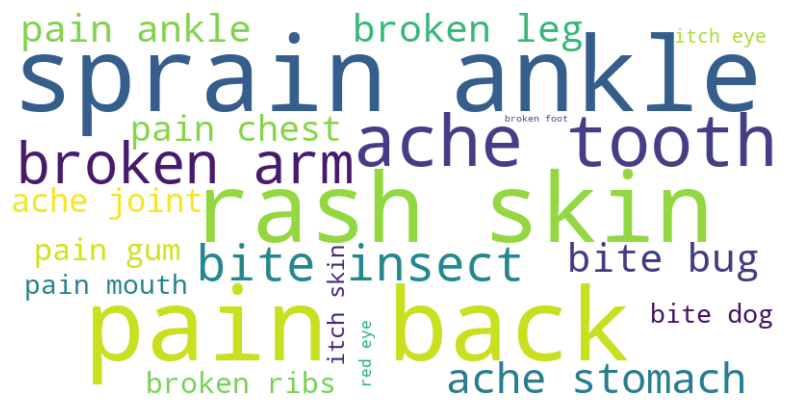

In [47]:
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<b>Plot interpretation</b>: The complaints for ankle sprain, back pain and skin rash have the largest text fonts and therefore can be taken as the most common user complaints. Red eye and eye itch are displayed in small fonts and can be taken as less frequent user complaints.

## Summary and conclusion

Both Part 1 (the Medi chatbot engine) and Part 2 (the user data analytics portion) of this project were made possible by using NLP techniques. These techniques include:

* A text classification pipeline (using count vectorization, TF-IDF transformer, and Multinomial Naïve Bayes classifier)
* Regular expressions
* Tokenizing
* Part-of-speech (POS) tagging
* Named Entity Recognition (NER)
* Removal of stop words that do not contribute to the meaning of a sentence
* Lemmatization (using both built-in and custom verb models)
* Sentiment analysis
* displaCy sentence structure visualization with POS tagging
* Word cloud visualization

These powerful tools and techniques powered the chatbot to act as an intelligent agent but also helped to gain insights into how the user interacted with the chatbot and obtain information about how the chatbot can be improved.

Chatbots are one way to provide access to users with information they need in a Question/Answer format. It may be easier to interact with an automated agent like a chatbot than a live person for medical questions by reducing embarrassment that may prevent the user from seeking help in the first place.




## Publication

YouTube Video Link: https://youtu.be/GmJT_Ft3dNs

GitHub Repo Link: https://github.com/PaulSandeen-mtsac/CISB63_Midterm